v_rel =  0.0005350526188751323
v_rel =  0.0005350526188751323
Q =  3.3539309775539383
3.3539309775539383


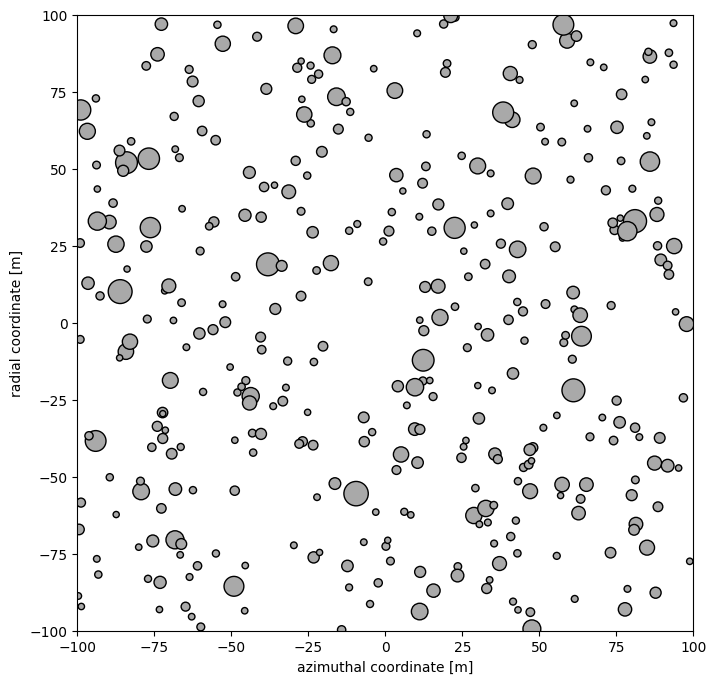

In [11]:
import rebound
import numpy as np
import imageio.v2 as imageio
import os




sim = rebound.Simulation()

OMEGA = 0.00013143527     # [1/s]

sim.ri_sei.OMEGA = OMEGA
surface_density = 50.    # kg/m^2
particle_density = 400.   # kg/m^3
sim.G = 6.67428e-11       # N m^2 / kg^2
sim.dt = 1e-3*2.*np.pi/OMEGA
sim.softening = 0.2       # [m]
boxsize = 200.            # [m]
orbit_radius = 1.3e8      # [m]
M_center = 5.683e26  # kg

r_mean = 1.6

tau = surface_density / particle_density / 1

v_rel = np.sqrt(sim.G * 4/3 * np.pi * particle_density * r_mean**2) 

print("v_rel = ", v_rel)


r_h = orbit_radius * (2 * 4*np.pi/3 * particle_density * r_mean**3 / 3 / M_center)**(1/3)
if r_h < r_mean:
    v_rel = 2 * r_mean * OMEGA
else:
    v_rel = np.sqrt(sim.G * 4*np.pi/3 * particle_density * r_mean**3 / r_mean)

print('v_rel = ', v_rel)


Q = v_rel * OMEGA / np.pi / sim.G / surface_density

print("Q = ", Q)

sim.configure_box(boxsize)
sim.N_ghost_x = 2
sim.N_ghost_y = 2
sim.integrator = "sei"
sim.boundary   = "shear"
sim.gravity    = "tree"
sim.collision  = "tree"
sim.collision_resolve = "hardsphere"
def cor_bridges(r, v):
        eps = 0.32*pow(abs(v)*100.,-0.234)
        if eps>1.:
            eps=1.
        if eps<0.:
            eps=0.
        return eps
sim.coefficient_of_restitution = cor_bridges

def powerlaw(slope, min_v, max_v):
    y = np.random.uniform()
    pow_max = pow(max_v, slope+1.)
    pow_min = pow(min_v, slope+1.)
    return pow((pow_max-pow_min)*y + pow_min, 1./(slope+1.))

total_mass = 0.
while total_mass < surface_density*(boxsize**2):
    radius = powerlaw(slope=-3, min_v=1, max_v=4)  # [m]    
    mass = particle_density*4./3.*np.pi*(radius**3)
    x = np.random.uniform(low=-boxsize/2., high=boxsize/2.)
    sim.add(
        m=mass,
        r=radius,
        x=x,
        y=np.random.uniform(low=-boxsize/2., high=boxsize/2.),
        z=np.random.normal(),
        vx = 0.,
        vy = -3./2.*x*OMEGA, 
        vz = 0.)
    total_mass += mass

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def plotParticles(sim):
    fig = plt.figure(figsize=(8,8))
    ax = plt.subplot(111,aspect='equal')
    ax.set_ylabel("radial coordinate [m]")
    ax.set_xlabel("azimuthal coordinate [m]")
    ax.set_ylim(-boxsize/2.,boxsize/2.)
    ax.set_xlim(-boxsize/2.,boxsize/2.)

    for i, p in enumerate(sim.particles):
        circ = patches.Circle((p.y, p.x), p.r, facecolor='darkgray', edgecolor='black')
        ax.add_patch(circ)

plotParticles(sim)
print(Q)
# print(r_h)

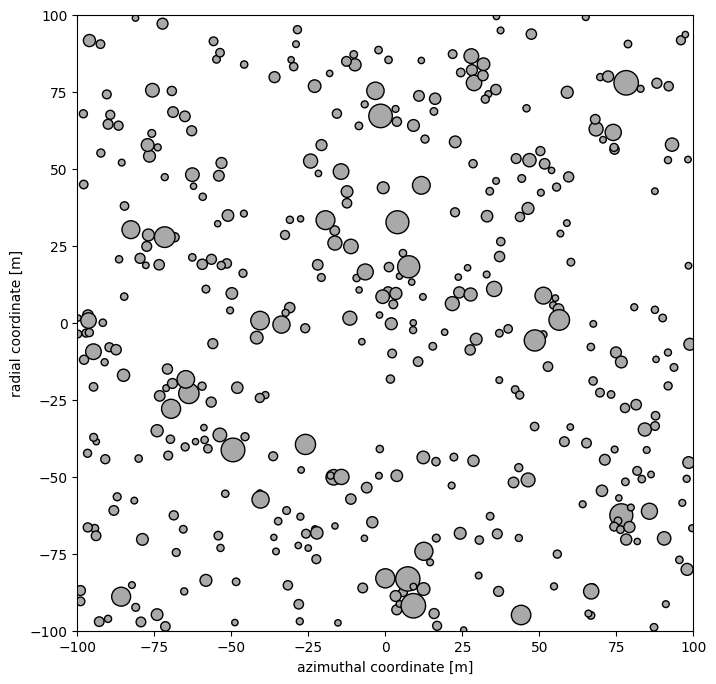

In [6]:
sim.integrate(2.*np.pi/OMEGA)
plotParticles(sim)

In [2]:
radius = np.zeros(len(sim.particles))
for i in range(len(sim.particles)):
    radius[i] = sim.particles[i].r
np.sum(np.pi * radius**2) / 200**2, surface_density * 200**2, np.sum(4*np.pi/3 * particle_density * radius**3) 

(0.08066246372222363, 4000000.0, 4061927.209246658)

In [3]:
velocities = np.zeros([len(sim.particles), 3])

for i in range(len(sim.particles)):
    velocities[i,0] = sim.particles[i].vx
    velocities[i,1] = sim.particles[i].vy
    velocities[i,2] = sim.particles[i].vz

np.max(velocities[:,0]), np.max(velocities[:,1]), np.max(velocities[:,2]), np.min(velocities[:,0]), np.min(velocities[:,1]), np.min(velocities[:,2])

(0.0, 0.019501123212513558, 0.0, 0.0, -0.019498824596524036, 0.0)

In [4]:
times = np.linspace(0., 2.*np.pi/OMEGA, 100)
filenames = []
for i, t in enumerate(times):
    sim.integrate(t)
    if i % 1 == 0:
        print(i, t)
        sim.integrate(t)
        plotParticles(sim)
        filename = "frame_%03d.png" % i
        filenames.append(filename) 
        plt.savefig(filename, dpi=300)
        plt.close()

def generate_gif(filenames, output_path='gif/particles.gif'):
    images = []
    for idx, fname in enumerate(filenames):
        print('processing frame', idx, 'of', len(filenames))
        image_file = f"frame_{idx:03d}.png"
        images.append(imageio.imread(image_file))
        os.remove(image_file)

    imageio.mimsave(output_path, images)

generate_gif(filenames, output_path='rebound.gif')



# sim.integrate(2.*np.pi/OMEGA)
# plotParticles(sim)

0 0.0
1 482.87281073291246
2 965.7456214658249
3 1448.6184321987373
4 1931.4912429316498
5 2414.364053664562
6 2897.2368643974746
7 3380.109675130387
8 3862.9824858632996
9 4345.855296596212
10 4828.728107329124
11 5311.600918062037
12 5794.473728794949
13 6277.346539527862
14 6760.219350260774
15 7243.092160993687
16 7725.964971726599
17 8208.837782459512
18 8691.710593192423
19 9174.583403925337
20 9657.456214658248
21 10140.329025391162
22 10623.201836124073
23 11106.074646856987
24 11588.947457589898
25 12071.820268322812
26 12554.693079055724
27 13037.565889788637
28 13520.438700521549
29 14003.311511254462
30 14486.184321987374
31 14969.057132720287
32 15451.929943453199
33 15934.80275418611
34 16417.675564919024
35 16900.548375651935
36 17383.421186384847
37 17866.293997117762
38 18349.166807850674
39 18832.039618583585
40 19314.912429316497
41 19797.785240049412
42 20280.658050782324
43 20763.530861515235
44 21246.403672248147
45 21729.276482981062
46 22212.149293713974
47 2269